## Category plots to show the budget and popularity of films based on novels

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import json 
import os

sns.set(style="whitegrid")

pd.options.display.max_rows = 10

In [2]:
os.chdir('..')
cwd = os.getcwd()
data_dir = '/data/' #path to the data folder which contains a 'pre-processed' folder within it

In [3]:
#getting maps for the keywords 'books based on a novel'
movie_details_neat = pd.read_pickle(cwd + data_dir + 'pre-processed/movie_details_neat.pkl')

with open(cwd + data_dir + 'pre-processed/id_maps.json', 'r') as f:
    id_maps = json.load(f)

def retrieve_category(df, column_name, ids, id_key_name, result_file_name='', id_maps=None):
    result = df[df.apply(lambda row: False if id_key_name not in row[column_name].keys() else (ids in (row[column_name][id_key_name])), axis=1)]
    if not result_file_name:
        if id_maps:
            result_file_name = column_name + '_' + id_maps[column_name][str(ids)]
        else:
            result_file_name = column_name + '_' + str(ids)
    result.to_pickle(cwd + data_dir + 'pre-processed/' + result_file_name + '.pkl')
    return result

def check_category(id_maps, column_name):
    print(json.dumps(id_maps[column_name], indent=4))

check_category(id_maps, 'genres')


{
    "18": "Drama",
    "10749": "Romance",
    "12": "Adventure",
    "14": "Fantasy",
    "28": "Action",
    "35": "Comedy",
    "80": "Crime",
    "53": "Thriller",
    "878": "Science Fiction",
    "27": "Horror",
    "9648": "Mystery",
    "10751": "Family",
    "16": "Animation",
    "10752": "War",
    "36": "History",
    "37": "Western",
    "10402": "Music",
    "99": "Documentary",
    "10769": "Foreign",
    "10770": "TV Movie"
}


In [4]:
#find the keywords that would allow us to pick out movies based off books (for example)
def idmap_searcher(id_map_key, kws):
    idz = []
    for query_string in kws:
        for id in id_maps[id_map_key]:
            if id_maps[id_map_key][id].find(query_string) != -1:
                idz.append(id)
                print(id_maps['keywords'][id], id)
            #if keyword in id_maps['keywords'][id]:
            #    idz.append(id)
            #    print(id_maps['keywords'][id])


In [5]:
# what keywords contain novel?
idmap_searcher('keywords', ['novel'])


based on novel 818
based on graphic novel 18712
based on young adult novel 223438
novelist 155251
stolen novel 180405
plagiarized novel 180412
crime novelist 185767


In [6]:
plots_dir = "/plots/"

### Plot comparing budget and popularity of films based off books. 
The plot below shows that we significantly reduce the sample size of the data when we only consider films adapted from books. For films based on a novel, the average popularity score is low (28/100) but with a high standard deviation. Young adult novels which inspire movies seem to be more popular, with an average of 36/100. 

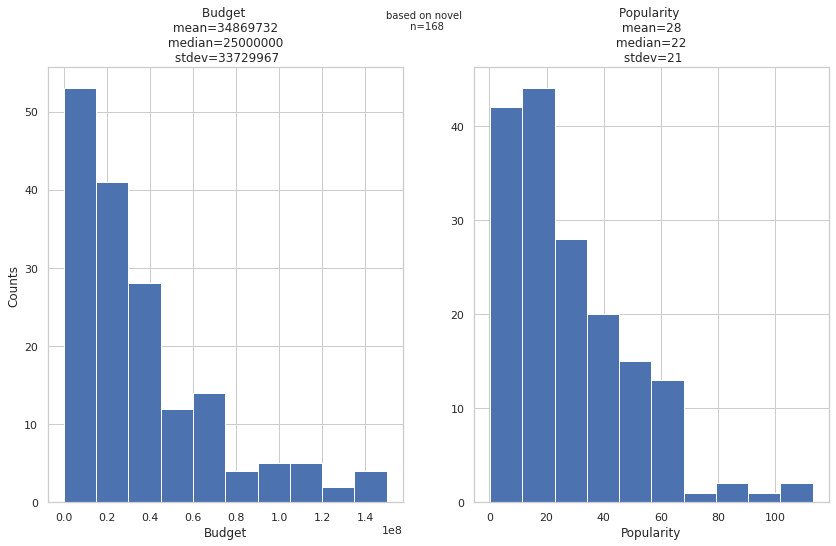

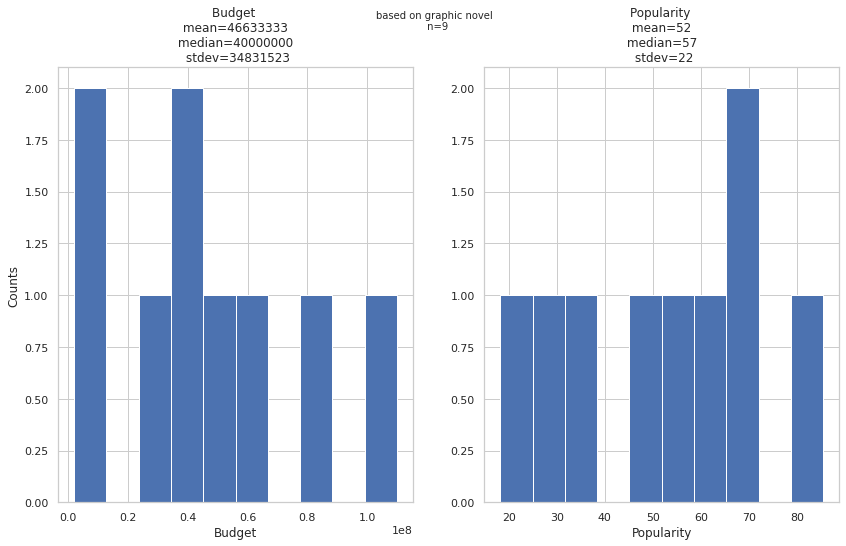

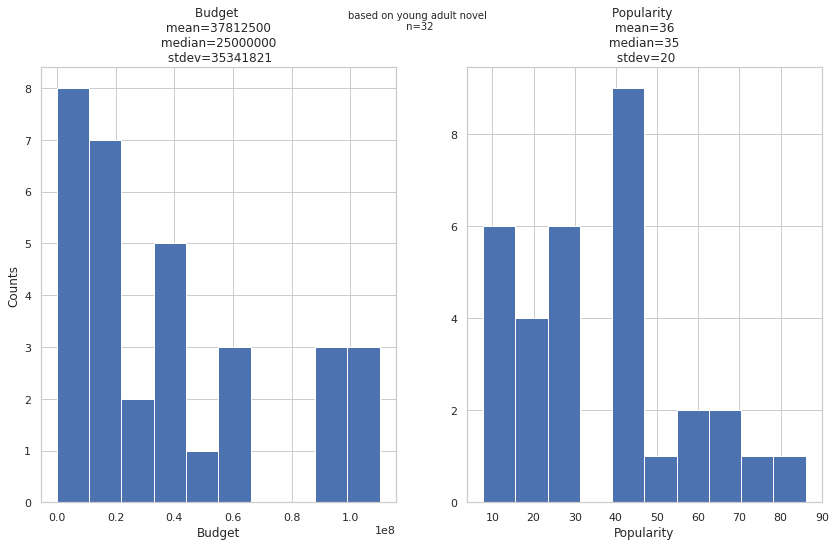

In [7]:
collect_these = {'keywords': [818, 18712, 223438]}
# can expand number of plots to include more of the columns etc.
for collect_type in collect_these.keys():
    for x in collect_these[collect_type]:
        thisgenre_df = retrieve_category(movie_details_neat, collect_type, x, 'id', '', id_maps)
    
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
        ax1 = thisgenre_df['budget'].hist(ax=ax1)
        ax1.set_title('Budget \n mean=%d \n median=%d \n stdev=%d' % (thisgenre_df['budget'].mean(), thisgenre_df['budget'].median(), thisgenre_df['budget'].std()))
        ax1.set_ylabel('Counts')
        ax1.set_xlabel('Budget')

        
        ax2 = thisgenre_df['popularity'].hist(ax=ax2)
        ax2.set_title('Popularity \n mean=%d \n median=%d \n stdev=%d' % (thisgenre_df['popularity'].mean(), thisgenre_df['popularity'].median(), thisgenre_df['popularity'].std()))
        ax2.set_xlabel('Popularity')
        
        f.suptitle('%s \n n=%d' % (id_maps[collect_type][str(x)], len(thisgenre_df)), fontsize=10)
        plt.savefig(cwd+plots_dir+"category_plots_for_novel_budget_popularity.png")
    #hist, bins = np.histogram(thisgenre_df['popularity'])
    #ax1.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='grey')
    #ax1.set_ylabel('Probability')
    #ax1.set_title('%s \n' % (id_maps['genres'][genre]))

    


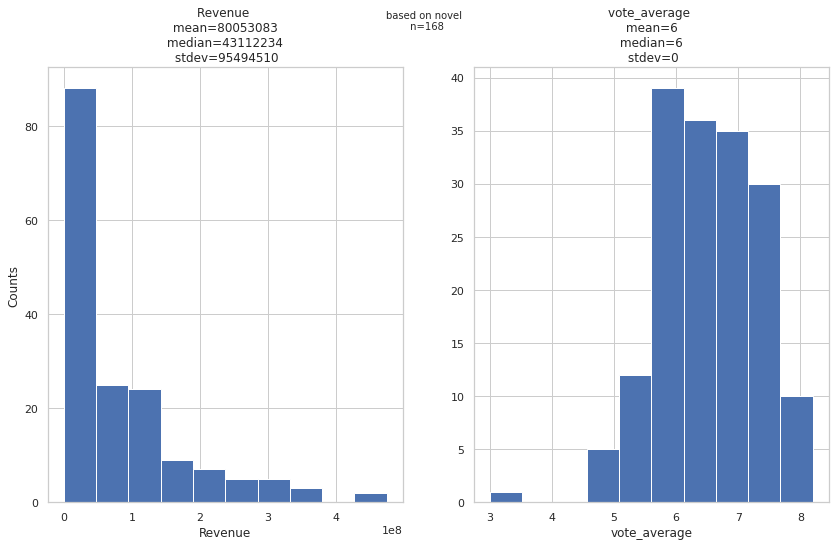

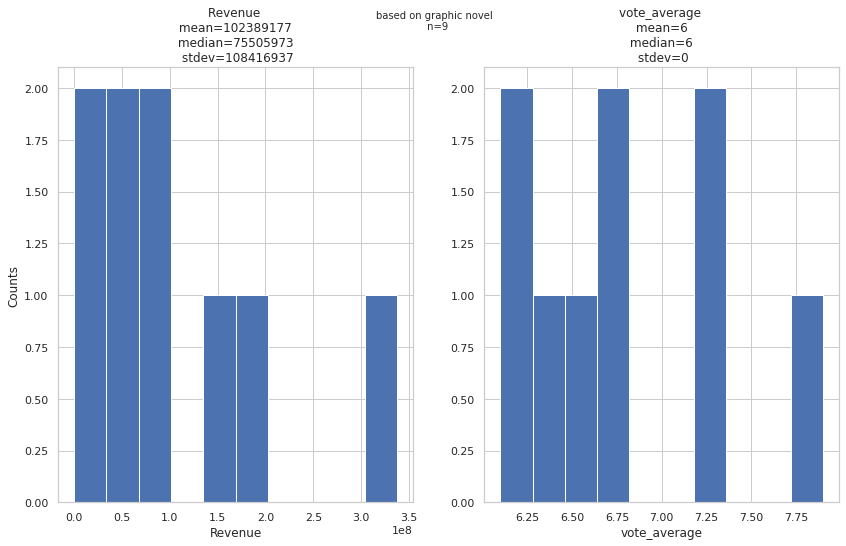

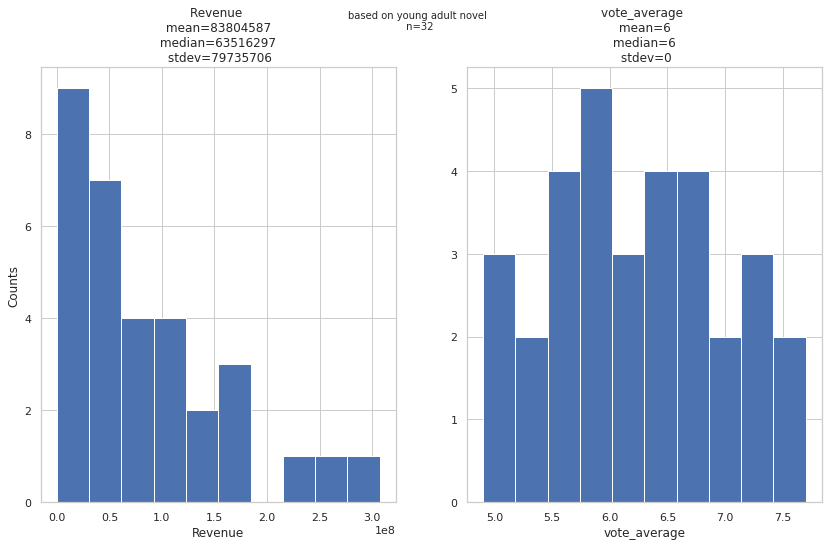

In [8]:
collect_these = {'keywords': [818, 18712, 223438]}
# can expand number of plots to include more of the columns etc.
for collect_type in collect_these.keys():
    for x in collect_these[collect_type]:
        thisgenre_df = retrieve_category(movie_details_neat, collect_type, x, 'id', '', id_maps)
    
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
        ax1 = thisgenre_df['revenue'].hist(ax=ax1)
        ax1.set_title('Revenue \n mean=%d \n median=%d \n stdev=%d' % (thisgenre_df['revenue'].mean(), thisgenre_df['revenue'].median(), thisgenre_df['revenue'].std()))
        ax1.set_ylabel('Counts')
        ax1.set_xlabel('Revenue')

        
        ax2 = thisgenre_df['vote_average'].hist(ax=ax2)
        ax2.set_title('vote_average \n mean=%d \n median=%d \n stdev=%d' % (thisgenre_df['vote_average'].mean(), thisgenre_df['vote_average'].median(), thisgenre_df['vote_average'].std()))
        ax2.set_xlabel('vote_average')
        
        f.suptitle('%s \n n=%d' % (id_maps[collect_type][str(x)], len(thisgenre_df)), fontsize=10)
        plt.savefig(cwd+plots_dir+"category_plots_for_novel_revenue_vote_average.png")
    #hist, bins = np.histogram(thisgenre_df['popularity'])
    #ax1.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='grey')
    #ax1.set_ylabel('Probability')
    #ax1.set_title('%s \n' % (id_maps['genres'][genre]))

    
